**Exercícios da 4a aula**

# Perceptron

1.   Rede neural com somente 1 neurônio e 1 camada
2.   Só resolve problemas lineares, ou seja, entrega somente **dois** resultados (V ou F)
3.   Computa os dados por regressão linear
4.   O erro é calculado e a partir dele o peso de cada entrada é ajustado, para ser computado o próximo exemplo

---



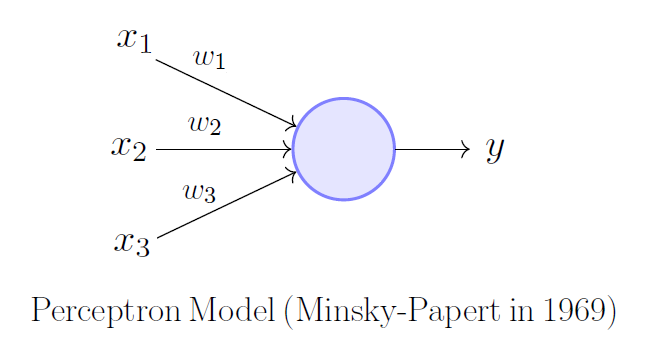


Xn = entradas

Wn = pesos

y = saída

---

1) Construa um modelo Perceptron que receba 3 parâmetros e 10 exemplos:

In [ ]:
import numpy as np
import pandas as pd


def step_function(x):
  return np.where(x > 0, 1, 0)


class Perceptron:
  def __init__(self, epoch, rate=0.01):
    self.epoch = epoch
    self.rate = rate
    self.function = step_function
    self.weights = None
    self.bias = None

  def ajust(self, x, y):
    samples, features = x.shape

    self.weights = np.random.random(features)
    self.bias = 1

    y_ = np.where(y > 0, 1, 0)

    for _ in range(self.epoch):
      for index, x_i in enumerate(x):
        linear = np.dot(x_i, self.weights) + self.bias
        y_predicted = self.function(linear)

        update = self.rate * (y_[index] - y_predicted)

        self.weights += update*x_i
        self.bias += update


  def predict(self, x):
    linear = np.dot(x, self.weights) + self.bias
    y_predicted = self.function(linear)
    return y_predicted


if __name__ == "__main__":
  import matplotlib.pyplot as plt
  from sklearn.model_selection import train_test_split
  from sklearn import datasets

  def accuracy(y_true, y_predicted):
    accuracy = np.sum(y_true == y_predicted) / len(y_true)
    return accuracy

  x, y = datasets.make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.05, random_state=2)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

  p = Perceptron(epoch=150, rate=0.72)
  p.ajust(x_train, y_train)
  predictions = p.predict(x_test)

  print(f"Acurácia desse modelo perceptron {accuracy(y_test, predictions)}")

Acurácia desse modelo perceptron 1.0
